Load the image of a dog using the following commands:

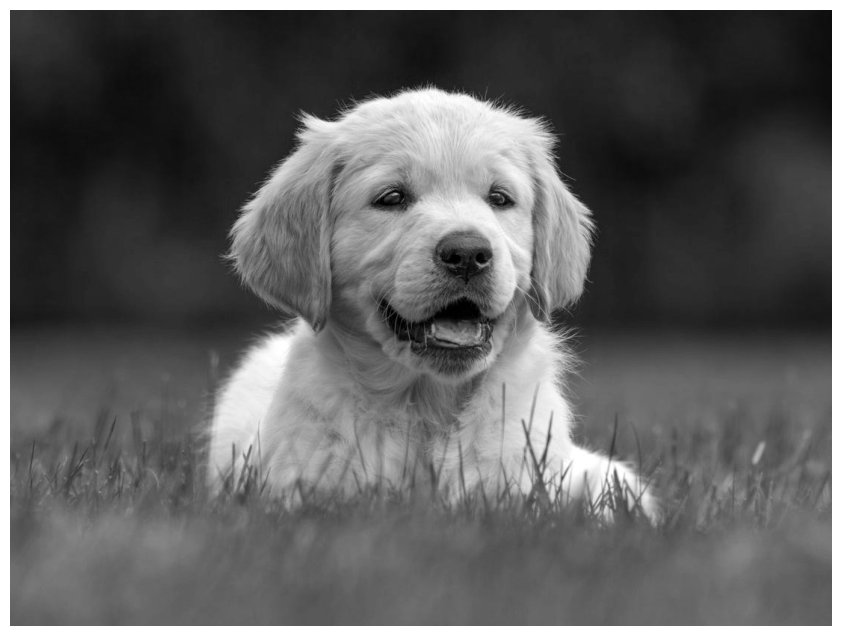

In [36]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams["figure.figsize"] = [16, 8]
A = imread(os.path.join(".", "dog.jpg"))
# Convert RGB to grayscale
X = np.mean(A, -1)

# plot image
img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

- 1: Compute the economy SVD;

In [37]:
U, s, VT = np.linalg.svd(X, full_matrices=False)

- 2: Let $\overline{X}$ be the approximation of $X$ of rank r using the SVD.

    Compute and plot the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$ for $r=1,2,\ldots$

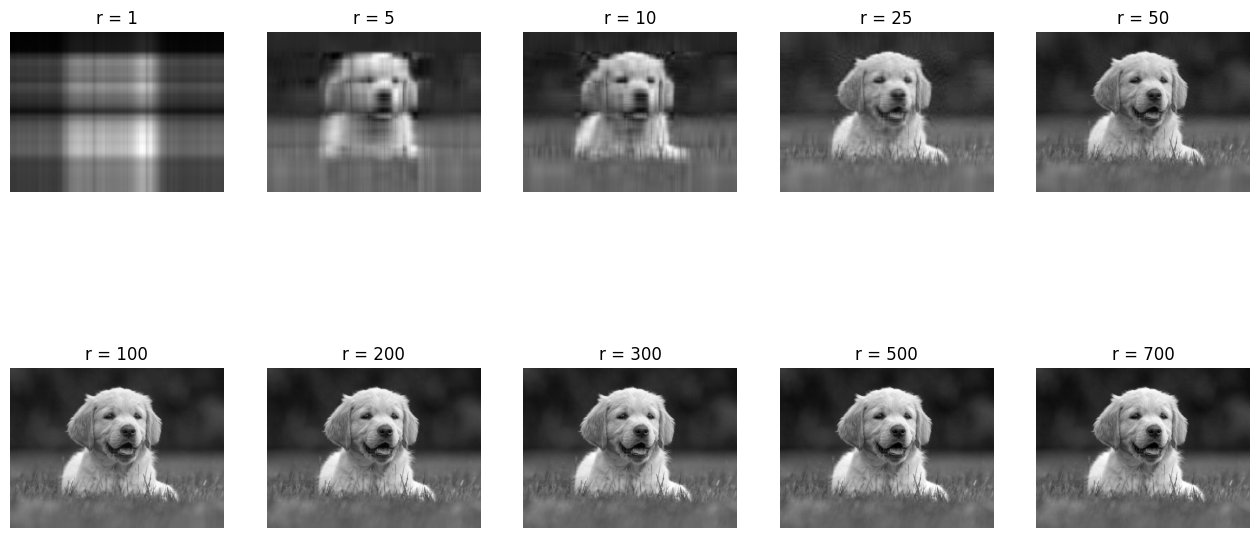

In [97]:
r_plot = np.array([1, 5, 10, 25, 50, 100, 200, 300, 500, 700])
fig, axs = plt.subplots(2, 5)
axs = axs.flatten()

X_norm = np.sqrt(np.sum(abs(X) ** 2))
norm_history = []
i = 0
for r in range(len(s)):
    Xapprox = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
    diff = X - Xapprox
    diff_norm = np.sqrt(np.sum(abs(diff) ** 2))
    norm_history.append(diff_norm / X_norm)
    if r in r_plot:
        axs[i].imshow(Xapprox, cmap="gray")
        axs[i].set_title("r = " + str(r))
        axs[i].axis("off")
        i += 1

norm_history = np.array(norm_history)

Text(0, 0.5, 'Relative Frobenius norm (reconstruction error)')

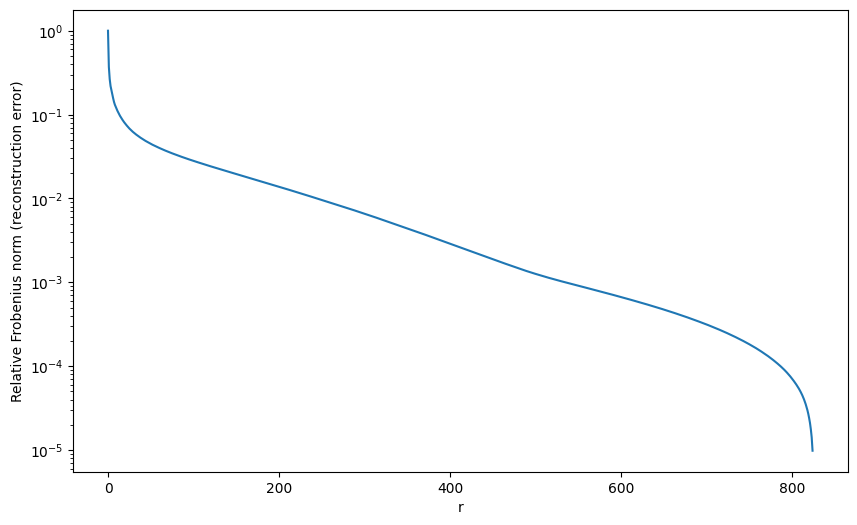

In [57]:
plt.figure(figsize=(10, 6))
plt.semilogy(norm_history)
plt.xlabel("r")
plt.ylabel("Relative Frobenius norm (reconstruction error)")

- 3: Square this error and plot it to compute the fraction of missing variance as a function of the rank $r$

14

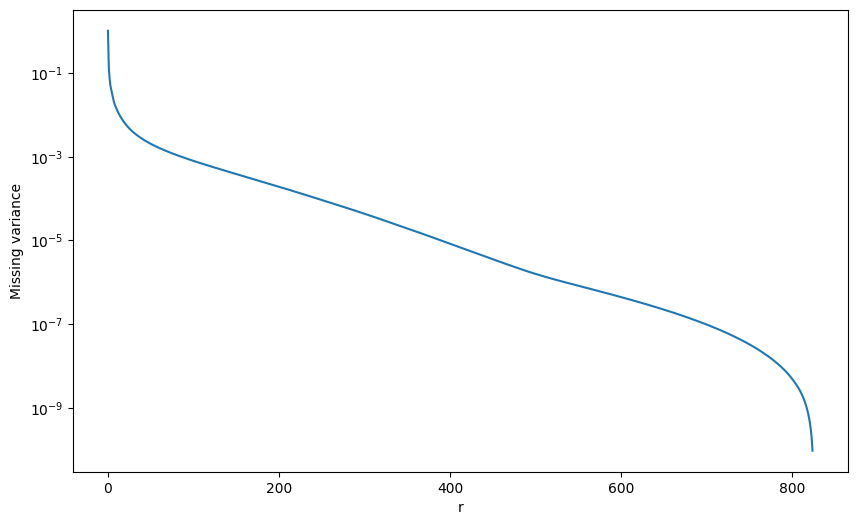

In [82]:
missing_variance = np.square(norm_history)

plt.figure(figsize=(10, 6))
plt.semilogy(missing_variance)
plt.xlabel("r")
plt.ylabel("Missing variance")

- 4: Find the rank $r_v$ where the reconstruction captures 99% of the total variance.

14


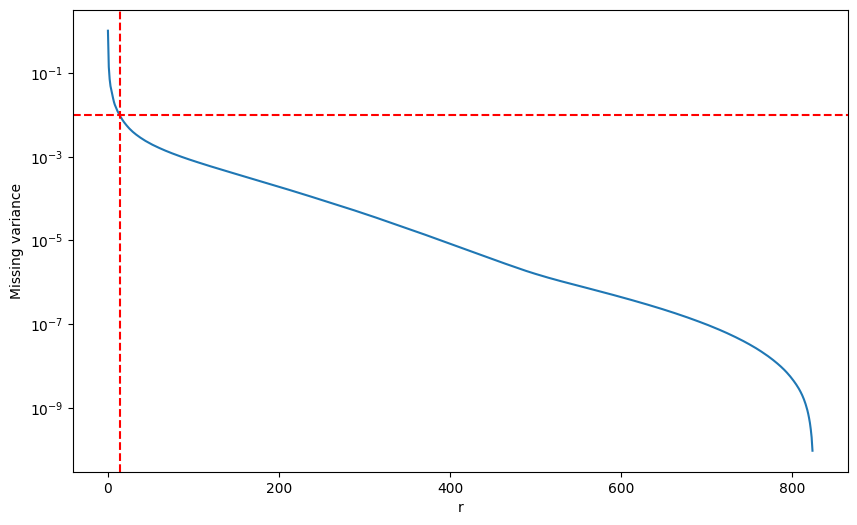

In [95]:
r_v = np.where(missing_variance <= 0.01)[0][0]
print(r_v)

missing_variance = np.square(norm_history)

plt.figure(figsize=(10, 6))
plt.semilogy(missing_variance)
plt.xlabel("r")
plt.ylabel("Missing variance")
plt.axvline(x=r_v, color="red", linestyle="--")
plt.axhline(y=0.01, color="red", linestyle="--")

We achieve the 99% of the total variance with a rank $r_v= 14$.

- 5: Compare $r_v$ with the rank $r_F$ where the reconstruction captures 99% of the Frobenius norm of the matrix and with the rank $r_c$ that captures 99% of the cumulative sum of singular values.

245


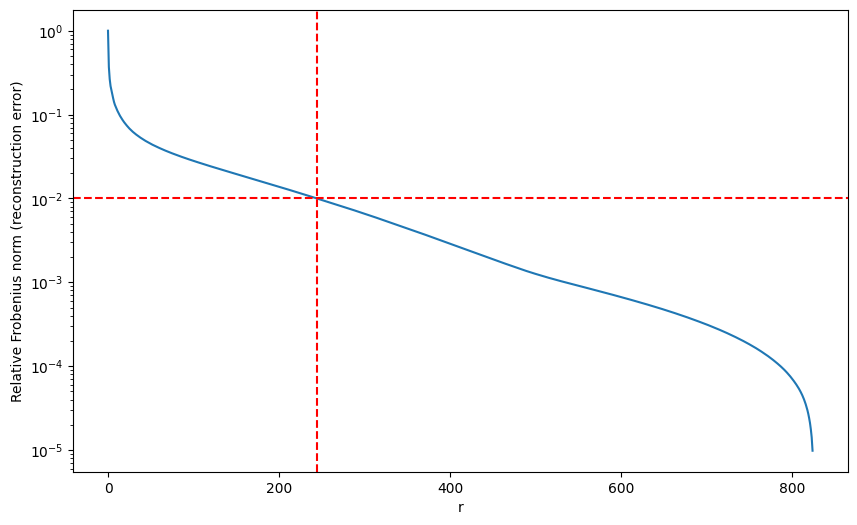

In [93]:
r_F = np.where(norm_history <= 0.01)[0][0]
print(r_F)

plt.figure(figsize=(10, 6))
plt.semilogy(norm_history)
plt.xlabel("r")
plt.ylabel("Relative Frobenius norm (reconstruction error)")
plt.axvline(x=r_F, color="red", linestyle="--")
plt.axhline(y=0.01, color="red", linestyle="--")

443
13


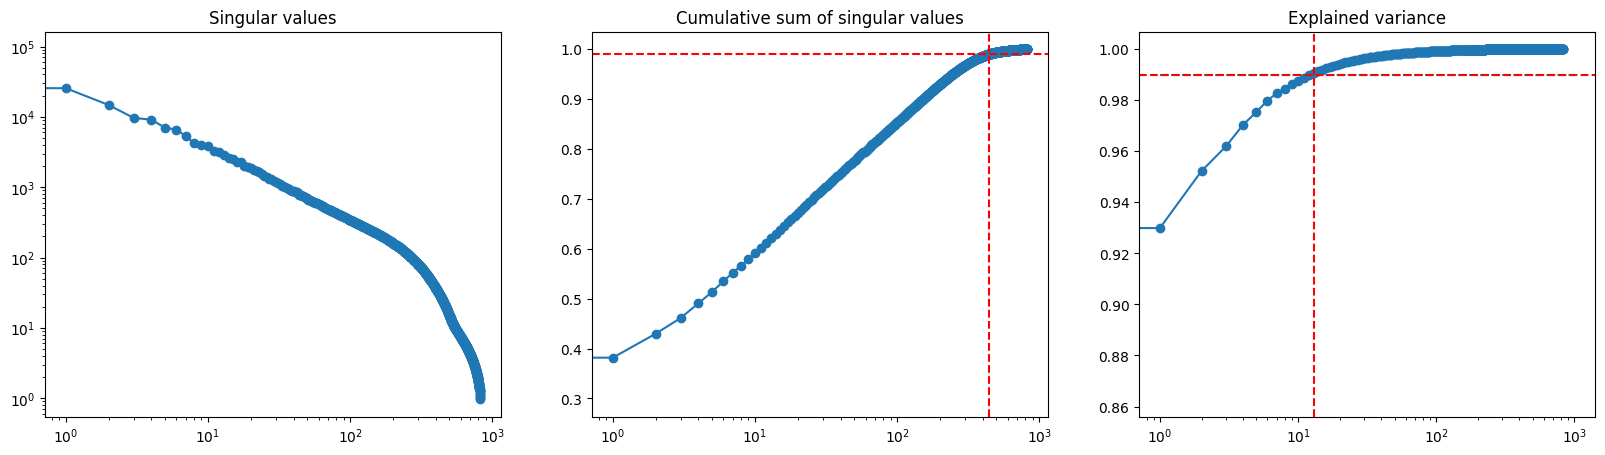

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].loglog(s, "o-")
axs[0].set_title("Singular values")
axs[1].semilogx(np.cumsum(s) / np.sum(s), "o-")
axs[1].set_title("Cumulative sum of singular values")
axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("Explained variance")
axs[2].hlines(0.99, 1, 1000, linestyles="dashed")

r_c = np.where(np.cumsum(s) / np.sum(s) >= 0.99)[0][0]
print(r_c)

# or even better
r_s = np.where(np.cumsum(s**2) / np.sum(s**2) >= 0.99)[0][0]
print(r_s)

axs[1].axvline(x=r_c, color="red", linestyle="--")
axs[1].axhline(y=0.99, color="red", linestyle="--")
axs[2].axvline(x=r_s, color="red", linestyle="--")
axs[2].axhline(y=0.99, color="red", linestyle="--")